In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import date

In [3]:
# wr_file is the whole report file name with suffix
# wi_file is the weekly info file name with suffix
# Load the data into memory
wr_file = 'W.M. London Ltd.xlsx'
wi_file = '00100_INV_83748407_20230214_60100366.xls'
#wi_file = '00100_INV_83712644_20221227_60100366_XLS.xlsx'
whole_report = pd.read_excel(wr_file, skiprows=1, sheet_name = 'Sheet1')
weekly_info = pd.read_excel(wi_file, sheet_name = 'Sheet1')

In [5]:
weekly_info.iloc[211]
whole_report

,Tracking number,Account code,Despatch date,Reference,Company / recipient,Postcode,Address ref,Service level,Weight (kg),Latest event,Status
0,7002939988,60100366,15/02/2023,1418081,Guanzhen Gao,E2 8HY,NaN,Next day,20.00,Item has been delivered as requested and recei...,Delivered
1,7002939794,60100366,15/02/2023,F4-3-1403077-1A,Wenbo Zhang,EC1V 8EH,NaN,Next day,1.04,Calling card has been left at the address,Attempted
2,7002935491,60100366,15/02/2023,AA1-2-1418081-1A,Guanzhen Gao,SW1P 4NF,NaN,Next day,20.00,Order details received,Pending
3,7002918320,60100366,15/02/2023,B3-4-1427326-1,Suhang AN,HA9 0JD,NaN,Next day,4.06,Order details received,Pending
4,7002918285,60100366,15/02/2023,JJ3-5-1426996-1,Zhuojie Huang,B1 1PR,NaN,Next day,3.92,Order details received,Pending
...,...,...,...,...,...,...,...,...,...,...,...
1249,7002352450,60100366,17/01/2023,??-10974-AIR,Shu Chen,BR3 5LP,NaN,Next day,15.00,Item has been delivered as requested and recei...,Delivered
1250,7002352318,60100366,17/01/2023,??-10194-AIR,Ryan,NW7 1RR,NaN,Next day,24.00,Item has been delivered as requested and recei...,Delivered
1251,7002352230,60100366,17/01/2023,??-10172-AIR,Hao Zeng,SW5 0PD,NaN,Next day,1.00,Item has been delivered as requested and recei...,Delivered
1252,7002352054,60100366,17/01/2023,JennyR-10171-AIR,Jenny Roberts,KT20 7AQ,NaN,Next day,5.00,Order details received,Pending


doing 0
doing 1000


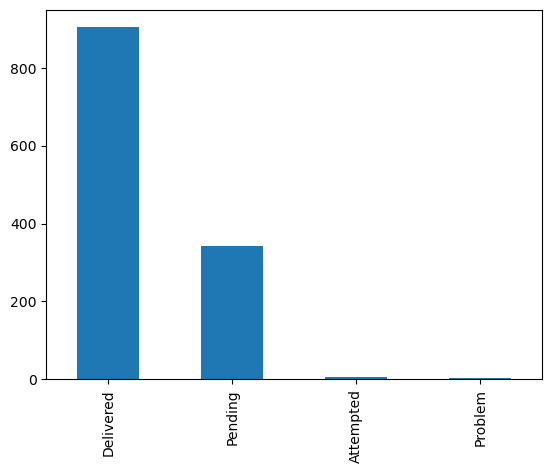

In [6]:
# to built the dictionary for the track number and status
whole_report['Status'].value_counts().plot.bar()
whole_report['Status'].value_counts()
whole_report['Tracking number'] = whole_report['Tracking number'].astype('int64')
whole_report.head()
whole_report_info  = whole_report[['Tracking number','Status']]
whole_report_info.head()
whole_report_dict = {}
for i, row in whole_report_info.iterrows():
    whole_report_dict[row['Tracking number']] = row['Status']
    if i% 1000 == 0:
        print('doing '+str(i))

In [7]:
# search function to find the status for a track number, if track number cannot be found, return Not Available
whole_report_dict.get(7001963679)
def search_status(x):
    if ';' in x:
        xs = x.split(';')
        result = [whole_report_dict.get(int(xx),'Not Available') for xx in xs if xx.isdigit()]
    else:
        if x.isdigit():
            result = [whole_report_dict.get(int(x),'Not Available')]
        else:
            result = ['Not Available']
    return result

'''remove the cases whose track number is empty'''
# weekly_info = weekly_info.loc[weekly_info['Tracking Numbers'].notnull()]

'remove the cases whose track number is empty'

In [8]:
'''remove the cases whose track number is empty'''
weekly_info = weekly_info.loc[weekly_info['Tracking Numbers'].notnull()]

for x in weekly_info['Tracking Numbers']:
    print(x)
    print(search_status(x))

7002599682
['Delivered']
7002599683
['Delivered']
7002599684
['Delivered']
7002599685
['Delivered']
7002599686
['Delivered']
7002599687
['Delivered']
7002599688
['Delivered']
7002599689
['Delivered']
7002599690
['Delivered']
7002599691
['Delivered']
7002599692
['Delivered']
7002599693
['Delivered']
7002599694
['Delivered']
7002599695
['Delivered']
7002599696
['Delivered']
7002599697
['Delivered']
7002599698
['Delivered']
7002599699
['Delivered']
7002599700
['Delivered']
7002599701
['Delivered']
7002599702
['Delivered']
7002599703
['Delivered']
7002599704
['Delivered']
7002599705
['Delivered']
7002599707
['Delivered']
7002599708
['Pending']
7002599709
['Delivered']
7002599710
['Delivered']
7002599711
['Delivered']
7002599712
['Delivered']
7002599713
['Delivered']
7002599714
['Delivered']
7002599715
['Delivered']
7002599716
['Delivered']
7002599717
['Delivered']
7002599718
['Delivered']
7002599719
['Delivered']
7002599720
['Delivered']
7002599721
['Delivered']
7002599722
['Delivered']
70

In [9]:
# produce additional columns for the status for each track numbers in weekly info
weekly_info['Status'] = weekly_info['Tracking Numbers'].apply(lambda x: search_status(x))

In [13]:
output_file = wi_file.split('.')[0]+'_with_status.csv'
output_file
weekly_info.to_csv(output_file)

In [16]:
# The output file name which include everything in one file
wi_file_with_status = wi_file.split('.')[0]+str(date.today())+'_with_status.csv'

In [14]:
weekly_info['Status']

0                                            [Delivered]
1                                            [Delivered]
2                                            [Delivered]
3                                            [Delivered]
4                                            [Delivered]
                             ...                        
355                                          [Delivered]
356                                          [Delivered]
357    [Delivered, Delivered, Delivered, Delivered, D...
358    [Delivered, Delivered, Delivered, Delivered, D...
359                    [Delivered, Delivered, Delivered]
Name: Status, Length: 360, dtype: object

In [17]:
# to show how many row has 1,2 or more track number
weekly_info['Track_Number_Counts'] = weekly_info['Status'].apply(len)
weekly_info.to_csv(wi_file_with_status)
weekly_info['Track_Number_Counts'].value_counts()

1     2155
2      134
3       23
10       2
4        2
8        1
6        1
Name: Track_Number_Counts, dtype: int64

In [18]:
# find the cases with specified status
def get_track_number(status = 'Attempted'):
    mask = weekly_info['Status'].astype('str').str.contains(status)
    return weekly_info.loc[mask]

get_track_number('Problem')

,Invoice Number,Invoice Date,Billing Account Number,Billing Account Name,Manifest Number,Collection Date,Collection Day of Week,Customer Account Number,Customer Account Name,Consignment Number,...,Currency,VAT,Customer PO,Customer Reference,Consignee Name,DeliveryTown,Delivery Post Code,Tracking Numbers,Status,Track_Number_Counts
147,83712644.0,27/12/2022,60100366.0,W.M. London Ltd,6.010037e+11,19/12/2022,MON,60100366.0,W.M. London Ltd,7.001802e+09,...,GBP,STD,NaN,1030-10467-2BOX,Chen Zhen,NaN,M50 1AY,7001802346;7001802347,"[Problem, Delivered]",2
1182,83712644.0,27/12/2022,60100366.0,W.M. London Ltd,6.010037e+11,20/12/2022,TUE,60100366.0,W.M. London Ltd,7.001928e+09,...,GBP,STD,NaN,WB185079593GB,Zifei Yang,NaN,G4 9LH,7001927697,[Problem],1


In [19]:
# save each status into different sheet in a excel file
# show the count of track number with different status
status_list = weekly_info['Status'].sum()
status_set = set(status_list)

output_name = 'weekly_info_groups'+str(date.today())+'.xlsx'
with pd.ExcelWriter(output_name) as writer:
    for x in status_set:
        seperate_result =  get_track_number(x)
        seperate_result.to_excel(writer, sheet_name=x, index=False)
print('written to the excel with different status info')

written to the excel with different status info


In [15]:
# show the count of track number with different status
status_list = weekly_info['Status'].sum()
status_set = set(status_list)
for x in status_set:
    number = status_list.count(x)
    print(x+' has '+ str(number) + ' cases')

Attempted has 2 cases
Delivered has 389 cases
Problem has 2 cases
Pending has 4 cases
